## Proyecto final: Notebook 3

### David Tejeda - 9170350
### Juan Hernández - 9710120
### Mario Tabarini - 22000349


In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

from sklearn.linear_model import LinearRegression

from feature_engine.imputation import AddMissingIndicator, MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder
from feature_engine.transformation import LogTransformer
from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper

import scipy.stats as stats
from IPython.display import display, HTML

import joblib


In [15]:
data_noNAN = pd.read_csv('clean_attritions.csv') #Se importa acrhivo .CSV
data_noNAN.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,233,1054,1102.0,1,2,608,1.0,2.0,94.0,...,1,80,0,8.0,0,1,6.0,4,0,5
1,49.0,1237,269,279.0,8,1,608,2.0,3.0,61.0,...,4,80,1,10.0,3,3,10.0,7,1,7
2,37.0,233,1054,1373.0,2,2,82,4.0,4.0,92.0,...,2,80,0,7.0,3,3,0.0,0,0,0
3,33.0,1237,269,1392.0,3,4,608,5.0,4.0,56.0,...,3,80,0,8.0,3,3,8.0,7,3,0
4,37.0,1237,1054,591.0,2,1,462,7.0,1.0,40.0,...,4,80,1,6.0,3,3,2.0,2,2,2


In [16]:
def getColumnTypes(data_noNAN): #Función para determinar el tipo de dato en columnas del dataset. Si es numérica con más de 30 datos se clasifica como continua
     continuas = []
     discretas = []
     categoricas = []
     for col in data_noNAN.columns:
          if((data_noNAN[col].dtype == 'int64') or (data_noNAN[col].dtype == 'float64')):
               if(len(data_noNAN[col].unique()) > 30): 
                    continuas.append(col)
               else:
                    discretas.append(col)
          else:
               categoricas.append(col)

     return continuas, discretas, categoricas

continuas, discretas, categoricas = getColumnTypes(data_noNAN)

## Modelo de clasificación

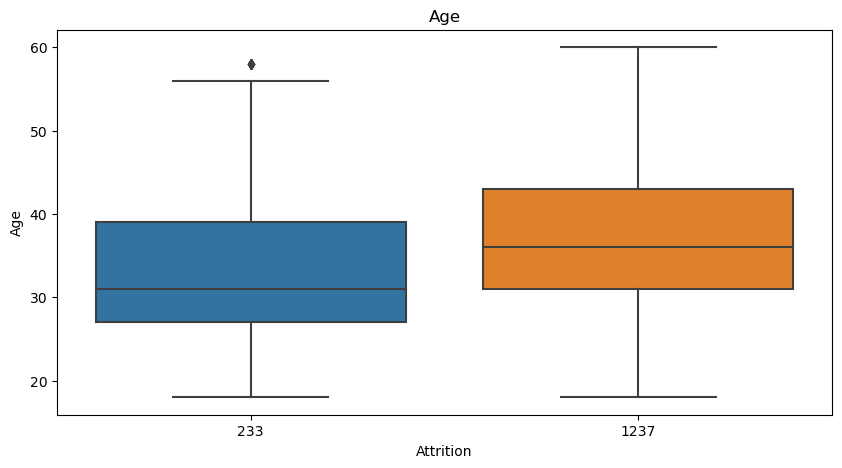

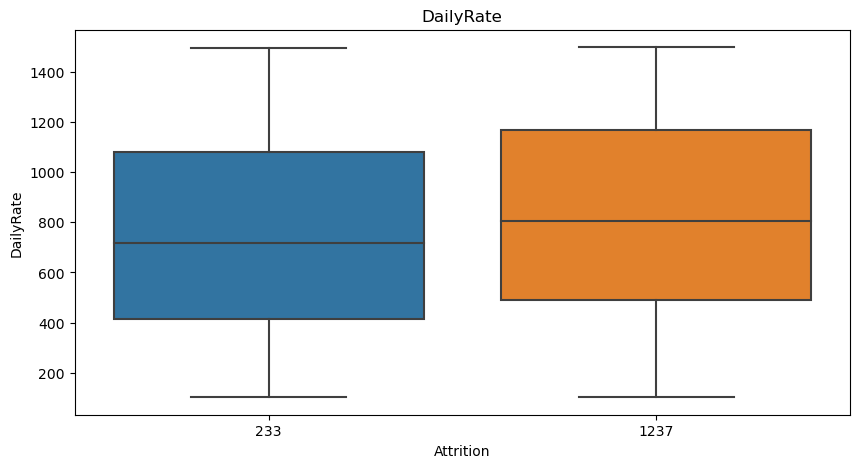

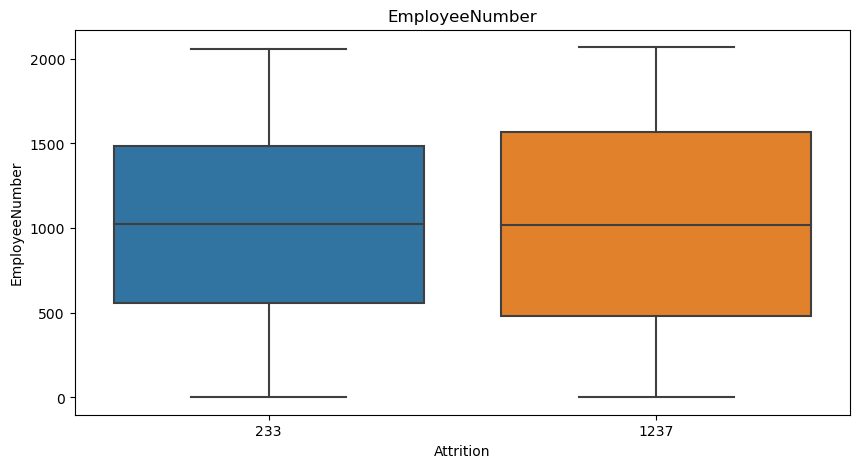

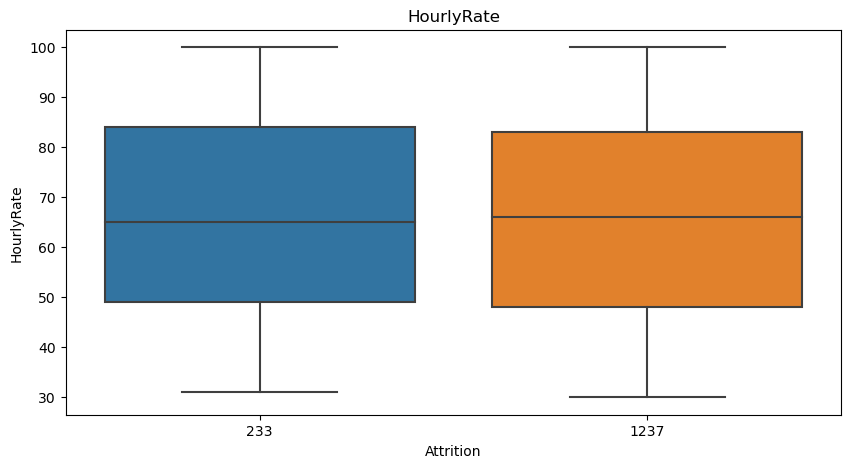

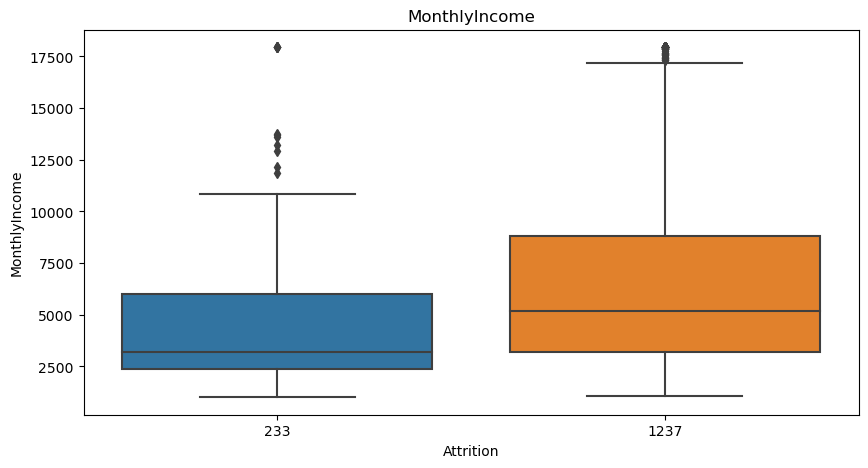

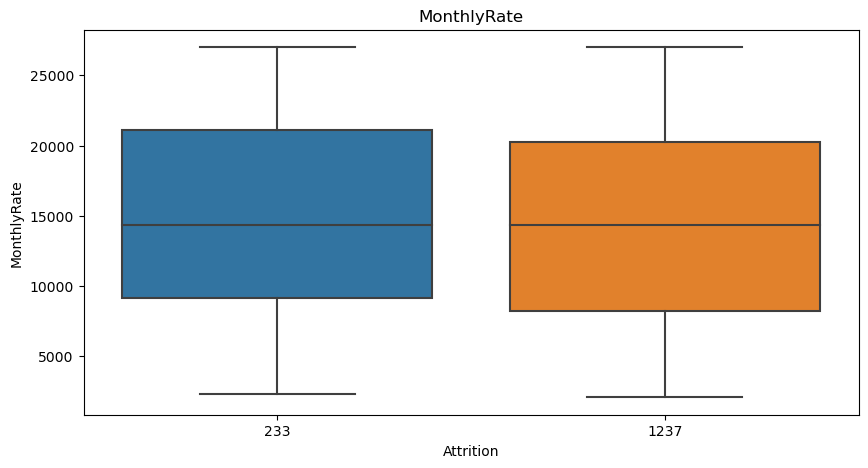

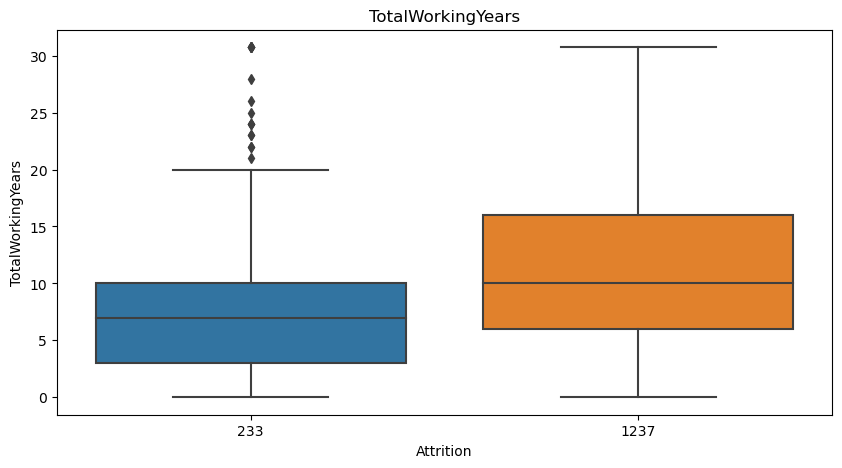

In [17]:
for colName in continuas:
       plt.figure(figsize=(10, 5))
       sns.boxplot(x=data_noNAN['Attrition'], y=data_noNAN[colName])
       plt.title(colName)
       plt.show()

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


In [19]:
# seleccionamos predictores y target.
X = data_noNAN.drop(['Attrition'], axis=1)
y = data_noNAN['Attrition']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2023)

In [21]:
data_noNAN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   float64
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   int64  
 7   EmployeeNumber            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   float64
 9   HourlyRate                1470 non-null   float64
 10  JobInvolvement            1470 non-null   float64
 11  JobLevel                  1470 non-null   float64
 12  JobRole                   1470 non-null   int64  
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Regresión logística

In [23]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train_std, y_train)

logit_preds = logit.predict(X_test_std)
logit_preds

array([1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237,
       1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237,  233, 1237, 1237,
       1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237,
       1237, 1237, 1237, 1237,  233, 1237, 1237, 1237, 1237, 1237,  233,
       1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237,
       1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237,
       1237, 1237, 1237, 1237, 1237,  233, 1237, 1237, 1237, 1237, 1237,
       1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237,
       1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237,
       1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237,
        233, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237,
       1237, 1237, 1237, 1237, 1237,  233, 1237, 1237, 1237, 1237, 1237,
       1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237, 1237,
       1237,  233, 1237,  233, 1237, 1237, 1237, 12

In [24]:
acc = round(accuracy_score(y_test, logit_preds), 5)
roc_auc = round(roc_auc_score(y_test, logit_preds), 5)

In [25]:
print(f"Accuracy: {acc}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.87075
ROC-AUC: 0.62898


In [26]:
from sklearn.model_selection import GridSearchCV, KFold

logit = LogisticRegression(solver='saga')
 
hyperparams_grid = {'penalty': ['l1', 'l2', 'elasticnet', None],
                                     'C': [0.01, 0.1, 1, 10],
                                     'fit_intercept': [True, False]
}

grid_search = GridSearchCV(estimator=logit, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs =-1, 
                                                                                     cv=KFold(n_splits=20, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc =  np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')

Mejores HyperParámetros: {'C': 1, 'fit_intercept': True, 'penalty': 'l2'}
Mejor Métrica: 0.8083921260440825
Mean Accuracy: 0.7039097850678733
Mean ROC_AUC: 0.7657303094157256


c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1471, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

--------------------------------------------------------------------------------
160 fits failed with the f

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

hyperparams_grid = {'n_estimators': [1000],
                                    'criterion': ['gini', 'entropy', 'log_loss']
}
    
grid_search = GridSearchCV(estimator=random_forest, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs =-1, 
                                                                                     cv=KFold(n_splits=20, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc =  np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')

c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\Mario T\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\Mario T\anaconda3\lib\site-p

Mejores HyperParámetros: {'criterion': 'entropy', 'n_estimators': 1000}
Mejor Métrica: 0.793309825685598
Mean Accuracy: 0.8643476621417798
Mean ROC_AUC: 0.7922766263393244


### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

gnb.fit(X_train_std, y_train)

y_pred = gnb.predict(X_test_std)
accuracy = gnb.score(X_test_std, y_test)
roc_auc = roc_auc_score(y_test, y_pred)
mean_acc = cross_val_score(gnb, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023)).mean()
mean_roc_auc = cross_val_score(gnb, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023), scoring='roc_auc').mean()

print(f'Accuracy: {accuracy}')
print(f'ROC_AUC: {roc_auc}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_auc}')

Accuracy: 0.7777777777777778
ROC_AUC: 0.6882589496924775
Mean Accuracy: 0.8096530920060332
Mean ROC_AUC: 0.7690553668073978


### LDA

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

lda = LinearDiscriminantAnalysis()

lda.fit(X_train_std, y_train)

y_pred = lda.predict(X_test_std)
accuracy = lda.score(X_test_std, y_test)
roc_auc = roc_auc_score(y_test, y_pred)
mean_acc = cross_val_score(lda, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023)).mean()
mean_roc_auc = cross_val_score(lda, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023), scoring='roc_auc').mean()

print(f'Accuracy: {accuracy}')
print(f'ROC_AUC: {roc_auc}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_auc}')

Accuracy: 0.854875283446712
ROC_AUC: 0.6015612679388109
Mean Accuracy: 0.8667797888386124
Mean ROC_AUC: 0.8060430058022154


### SVM

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

svm = SVC()

hyperparams_grid = {'C': [0.01, 0.1, 1, 10],
                    'kernel': ['linear', 'rbf', 'poly'],
                    'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(estimator=svm, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs=-1, cv=KFold(n_splits=20, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

mean_acc = cross_val_score(grid_search.best_estimator_, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023)).mean()
mean_roc_auc = cross_val_score(grid_search.best_estimator_, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023), scoring='roc_auc').mean()

print(f'Mejores HyperParámetros: {best_params}')
print(f'Mejor Métrica: {best_score}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_auc}')

Mejores HyperParámetros: {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
Mejor Métrica: 0.8084288014735959
Mean Accuracy: 0.8396304675716442
Mean ROC_AUC: 0.8084288014735959


### Árboles de decisión

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()

hyperparams_grid = {'max_depth': [3, 5, 10],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=dt, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs=-1, cv=KFold(n_splits=20, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

mean_acc = cross_val_score(grid_search.best_estimator_, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023)).mean()
mean_roc_auc = cross_val_score(grid_search.best_estimator_, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023), scoring='roc_auc').mean()

print(f'Mejores HyperParámetros: {best_params}')
print(f'Mejor Métrica: {best_score}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_auc}')

Mejores HyperParámetros: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mejor Métrica: 0.6803636442738155
Mean Accuracy: 0.8491704374057315
Mean ROC_AUC: 0.6803636442738155


### Análisis de discriminante cuadrático

In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train_std, y_train)

y_pred = qda.predict(X_test_std)
accuracy = qda.score(X_test_std, y_test)
roc_auc = roc_auc_score(y_test, y_pred)
mean_acc = cross_val_score(qda, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023)).mean()
mean_roc_auc = cross_val_score(qda, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023), scoring='roc_auc').mean()

print(f'Accuracy: {accuracy}')
print(f'ROC_AUC: {roc_auc}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_auc}')

c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaco

Accuracy: 0.7573696145124716
ROC_AUC: 0.5499329758713136
Mean Accuracy: 0.7840686274509803
Mean ROC_AUC: 0.6594497533290039


c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Mario T\anaco

### AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

adaboost = AdaBoostClassifier()

adaboost.fit(X_train_std, y_train)

y_pred = adaboost.predict(X_test_std)
accuracy = adaboost.score(X_test_std, y_test)
roc_auc = roc_auc_score(y_test, y_pred)
mean_acc = cross_val_score(adaboost, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023)).mean()
mean_roc_auc = cross_val_score(adaboost, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023), scoring='roc_auc').mean()

print(f'Accuracy: {accuracy}')
print(f'ROC_AUC: {roc_auc}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_auc}')

Accuracy: 0.8344671201814059
ROC_AUC: 0.589496924775272
Mean Accuracy: 0.8774132730015083
Mean ROC_AUC: 0.8058805897317333


### XGBoost

In [34]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Codificar las clases
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Definir el modelo XGBoost
xgb = XGBClassifier()

# Ajustar el modelo XGBoost
xgb.fit(X_train_std, y_train_encoded)

# Predecir y evaluar
y_pred = xgb.predict(X_test_std)
accuracy = xgb.score(X_test_std, y_test)
roc_auc = roc_auc_score(y_test, y_pred)
mean_acc = cross_val_score(xgb, X_train_std, y_train_encoded, cv=KFold(n_splits=20, shuffle=True, random_state=2023)).mean()
mean_roc_auc = cross_val_score(xgb, X_train_std, y_train_encoded, cv=KFold(n_splits=20, shuffle=True, random_state=2023), scoring='roc_auc').mean()

# Imprimir los resultados
print(f'Accuracy: {accuracy}')
print(f'ROC_AUC: {roc_auc}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_auc}')


Accuracy: 0.0
ROC_AUC: 0.6222796088944962
Mean Accuracy: 0.8600678733031675
Mean ROC_AUC: 0.7775314406754544


### LGBM

In [35]:
    from lightgbm import LGBMClassifier
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import cross_val_score

    lgbm = LGBMClassifier()

    lgbm.fit(X_train_std, y_train)

    y_pred = lgbm.predict(X_test_std)
    accuracy = lgbm.score(X_test_std, y_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    mean_acc = cross_val_score(lgbm, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023)).mean()
    mean_roc_auc = cross_val_score(lgbm, X_train_std, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=2023), scoring='roc_auc').mean()

    print(f'Accuracy: {accuracy}')
    print(f'ROC_AUC: {roc_auc}')
    print(f'Mean Accuracy: {mean_acc}')
    print(f'Mean ROC_AUC: {mean_roc_auc}')

Accuracy: 0.8662131519274376
ROC_AUC: 0.6142761394101877
Mean Accuracy: 0.8570701357466064
Mean ROC_AUC: 0.7836564785318706
